# KNN Classification of Weather

## Introduction

## Preliminary Exploratory Data Analysis

In [30]:
# Run this code to set up the notebook
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)

In [31]:
set.seed(1)

In [32]:
# Read the data into R (downloaded as csv from https://www.kaggle.com/ananthr1/weather-prediction)
weather_data <- read_csv("weather.csv") %>%
    mutate(weather = as_factor(weather),
           temp_avg = (temp_max + temp_min)/2)
weather_data

Parsed with column specification:
cols(
  date = col_date(format = ""),
  precipitation = col_double(),
  temp_max = col_double(),
  temp_min = col_double(),
  wind = col_double(),
  weather = col_character()
)



date,precipitation,temp_max,temp_min,wind,weather,temp_avg
<date>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>
2012-01-01,0.0,12.8,5.0,4.7,drizzle,8.90
2012-01-02,10.9,10.6,2.8,4.5,rain,6.70
2012-01-03,0.8,11.7,7.2,2.3,rain,9.45
⋮,⋮,⋮,⋮,⋮,⋮,⋮
2015-12-29,0,7.2,0.6,2.6,fog,3.90
2015-12-30,0,5.6,-1.0,3.4,sun,2.30
2015-12-31,0,5.6,-2.1,3.5,sun,1.75


In [33]:
# Count the number of observations for each weather type
weather_data_count <- weather_data %>%
    group_by(weather) %>%
    summarize(n = n())
weather_data_count
# Calculate the means of predictor variables to be used in the analysis
# TODO: change to human-readable names
weather_predictor_means <- weather_data %>%
    select(precipitation, temp_avg, wind) %>%
    map(mean)
weather_predictor_means

`summarise()` ungrouping output (override with `.groups` argument)



weather,n
<fct>,<int>
drizzle,53
rain,641
sun,640
snow,26
fog,101


$precipitation
[1] 3.029432

$temp_avg
[1] 12.33693

$wind
[1] 3.241136

In [39]:
# Scale the weather data
weather_data_scaled <- weather_data %>%
    mutate(scaled_precipitation = scale(precipitation, center = TRUE),
          scaled_wind = scale(wind, center = TRUE),
          scaled_temp_avg = scale(temp_avg, center = TRUE))
weather_data_scaled

date,precipitation,temp_max,temp_min,wind,weather,temp_avg,scaled_precipitation,scaled_wind,scaled_temp_avg
<date>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,"<dbl[,1]>","<dbl[,1]>","<dbl[,1]>"
2012-01-01,0.0,12.8,5.0,4.7,drizzle,8.90,-0.4534946,1.0146323,-0.5730072
2012-01-02,10.9,10.6,2.8,4.5,rain,6.70,1.1781945,0.8755334,-0.9397930
2012-01-03,0.8,11.7,7.2,2.3,rain,9.45,-0.3337376,-0.6545554,-0.4813108
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
2015-12-29,0,7.2,0.6,2.6,fog,3.90,-0.4534946,-0.4459070,-1.406611
2015-12-30,0,5.6,-1.0,3.4,sun,2.30,-0.4534946,0.1104890,-1.673365
2015-12-31,0,5.6,-2.1,3.5,sun,1.75,-0.4534946,0.1800384,-1.765061


In [46]:
# Calculate the range of measured precipitation (scaled)
max(weather_data_scaled$scaled_precipitation)
min(weather_data_scaled$scaled_precipitation)

[1] 7.914525

[1] -0.4534946

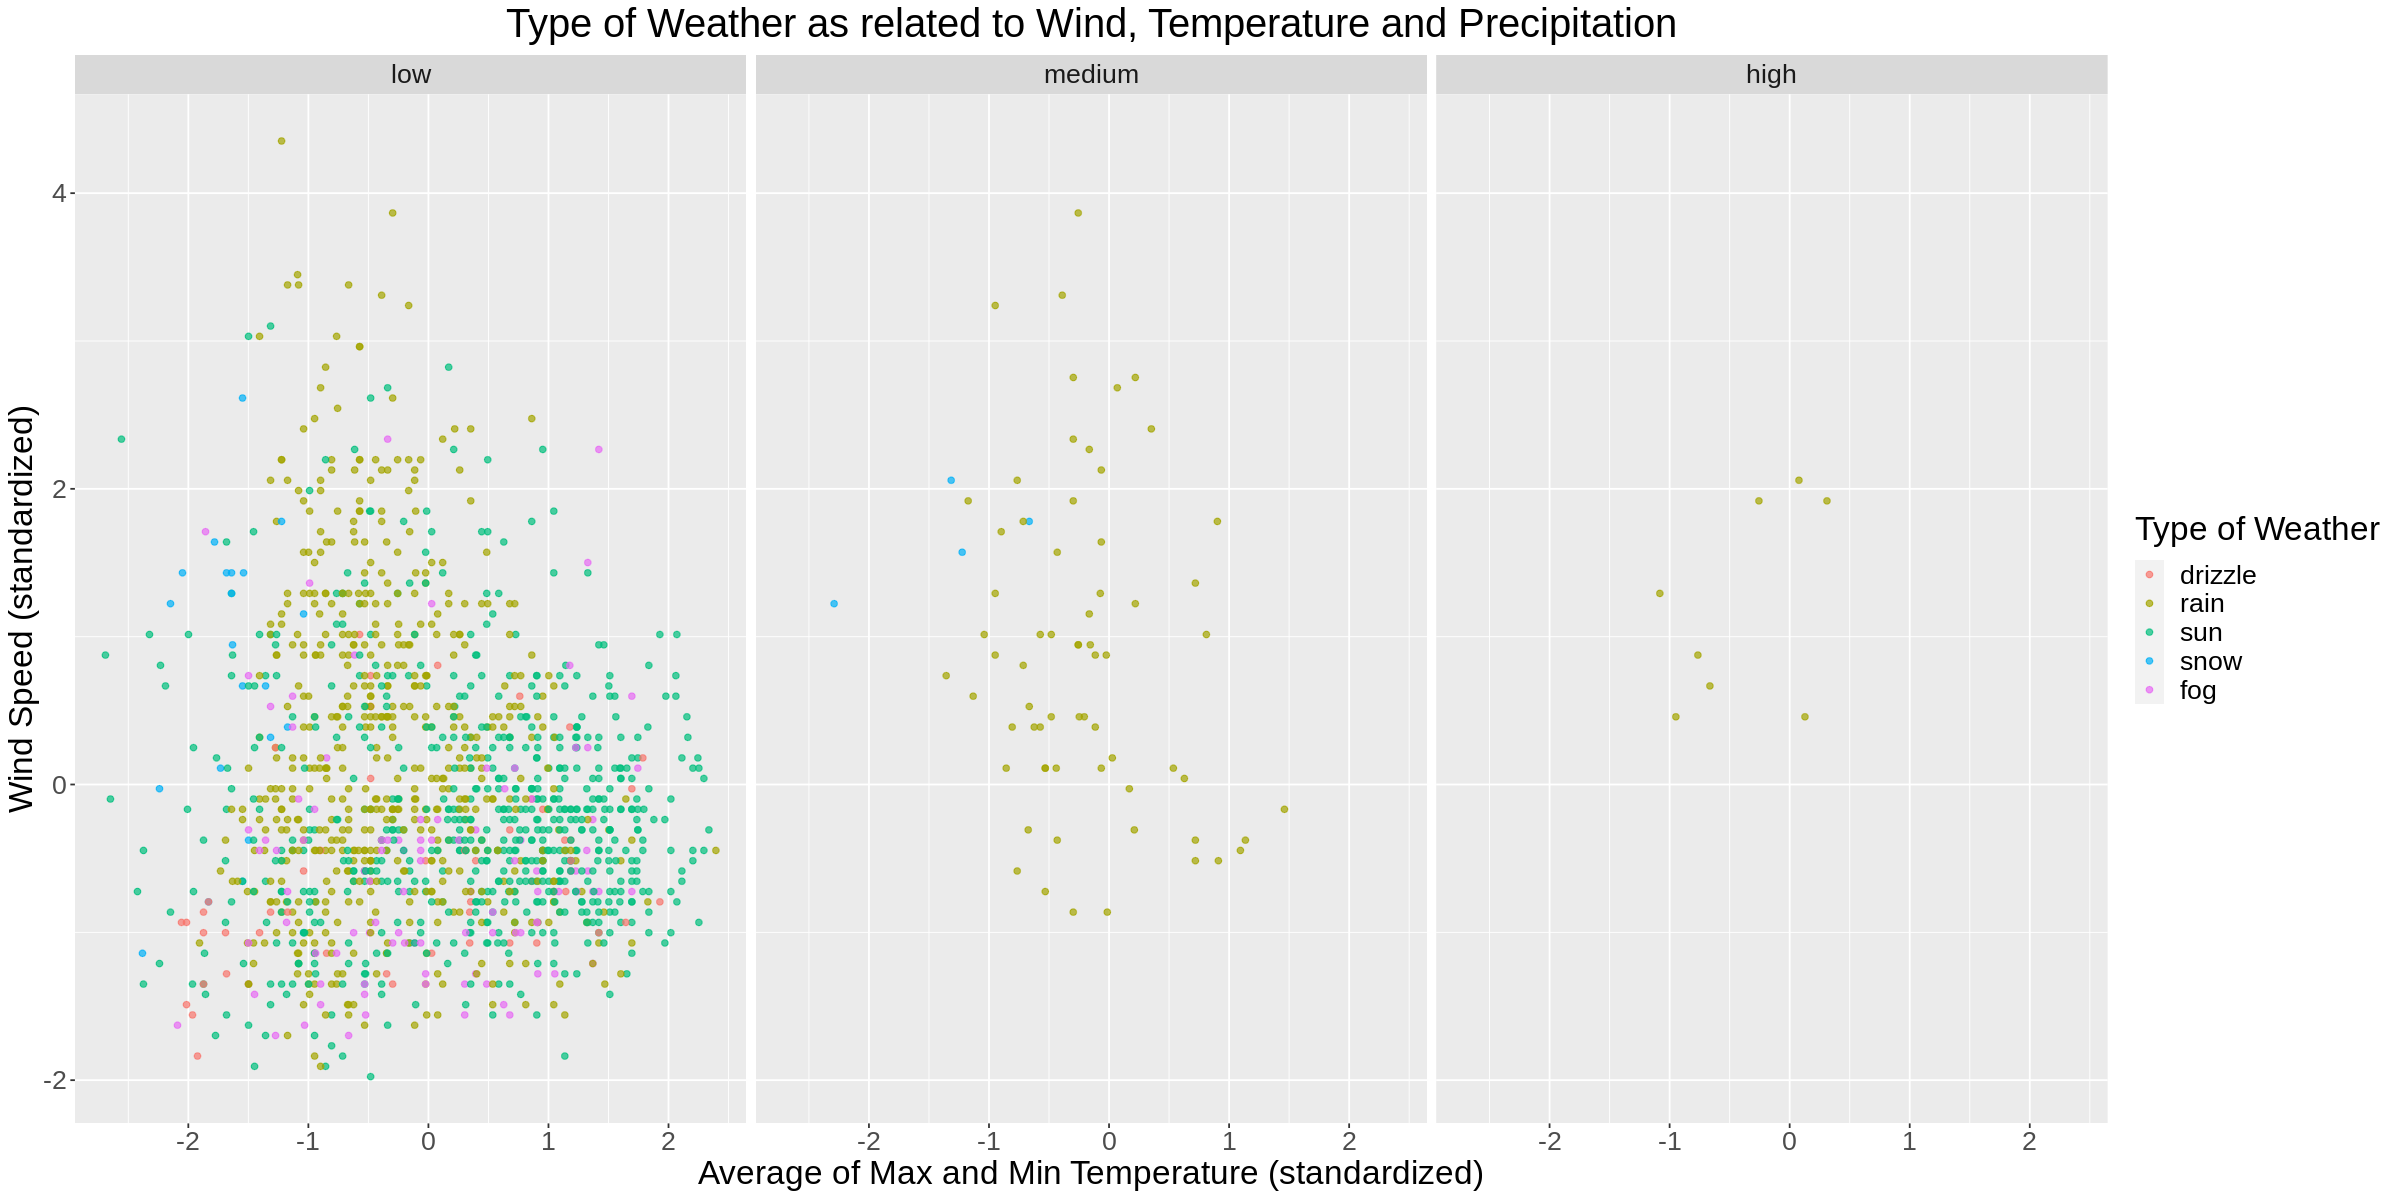

In [57]:
# Since precipitation values lie aproximately between [-1,8], we split the continuous variable into 3 categories
weather_data_scaled <- weather_data_scaled %>% 
    mutate(precipitation_category = cut(scaled_precipitation, breaks = c(-1, 2, 5, 8), labels = c("low", "medium", "high")))
# Create a plot of wind vs average temperature for each precipitation category, and use color to differentiate the type of weather
weather_plot <- weather_data_scaled %>%
    ggplot(aes(x = scaled_temp_avg, y = scaled_wind, color = weather)) +
    geom_point(alpha = 0.7) +
    facet_wrap(~precipitation_category) +
    labs(title = "Type of Weather as related to Wind, Temperature and Precipitation", color = "Type of Weather") +
    xlab("Average of Max and Min Temperature (standardized)") + 
    ylab("Wind Speed (standardized)") +
    theme(text = element_text(size = 20), plot.title = element_text(hjust = 0.5))
# Set an appropriate size for the plot
options(repr.plot.width = 20, repr.plot.height = 10)
weather_plot

In [6]:
weather_split <- initial_split(weather_data, prop = 0.75, strata = weather)
weather_train <- training(weather_split)
weather_test <- testing(weather_split)

## Methods

- Explain how you will conduct either your data analysis and which variables/columns you will use. Note - you do not need to use all variables/columns that exist in the raw data set. In fact, that's often not a good idea. For each variable think: is this a useful variable for prediction?
- Describe at least one way that you will visualize the results


- note the imbalance in number of observations of each class of weather

## Expected Outcomes and Significance

- What do you expect to find?
- What impact could such findings have?
- What future questions could this lead to?